**Name** : Muhammad Saad Ullah Khan Haidri

**Reg no** : 2022420

**Faculty** : Cyber Security

**LAB** : AI

**Task no 3**:


**Scenario: Exam Scheduling for a University**

In this scenario, we are scheduling exams for different courses in a university. Each course is represented as a node, and an edge between two nodes means that there are students enrolled in both courses. The goal is to assign different time slots (represented by colors) to courses with shared students so that no two courses with common students are scheduled at the same time.



Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 1


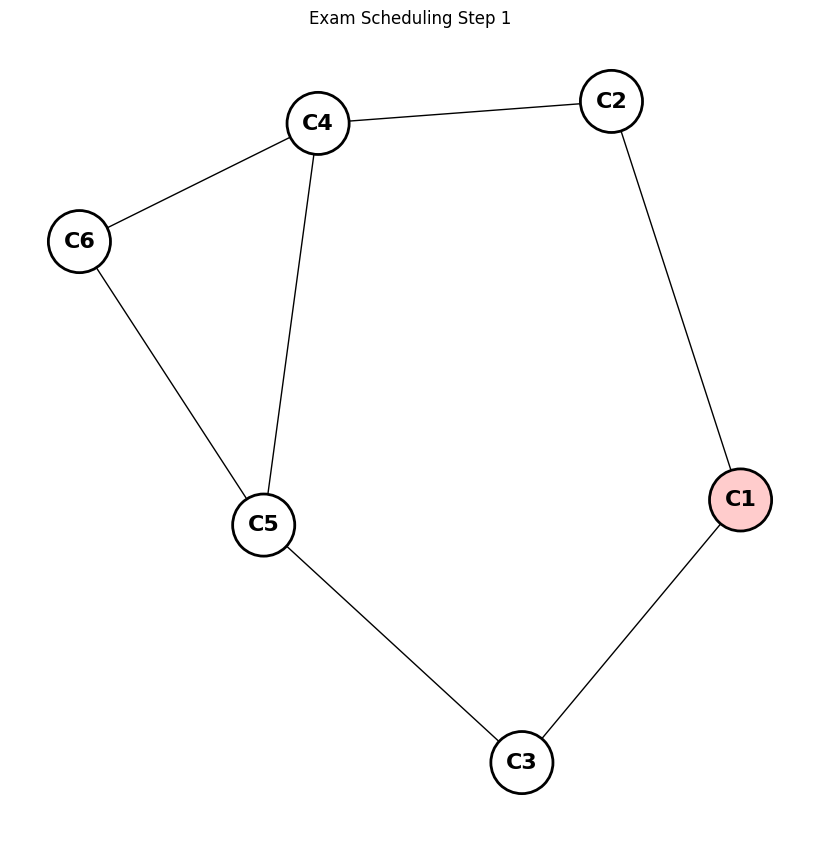

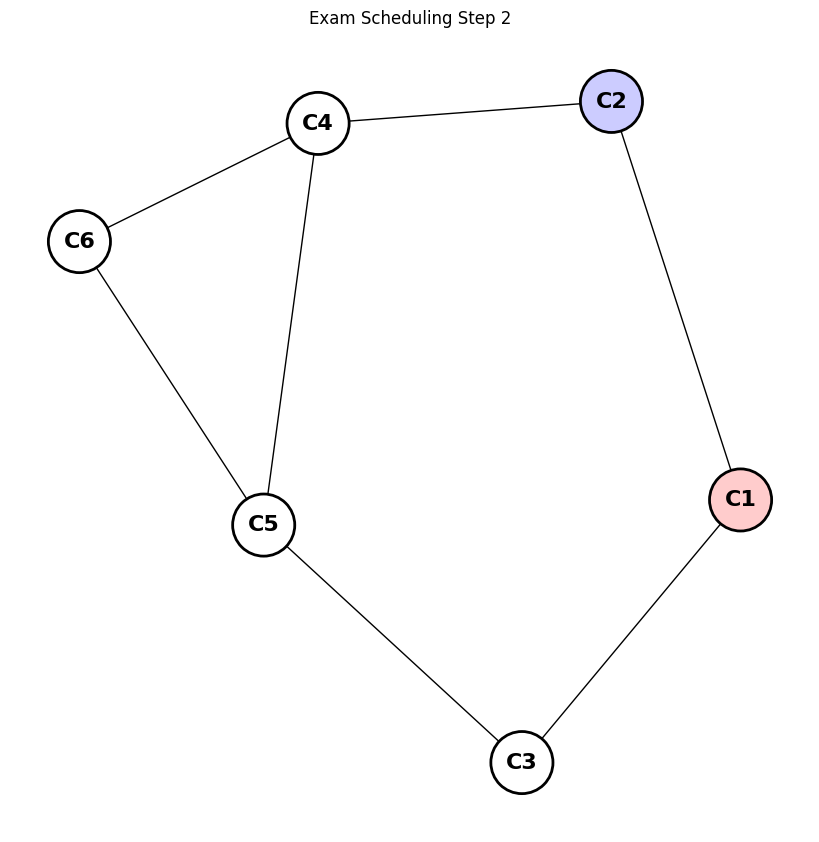

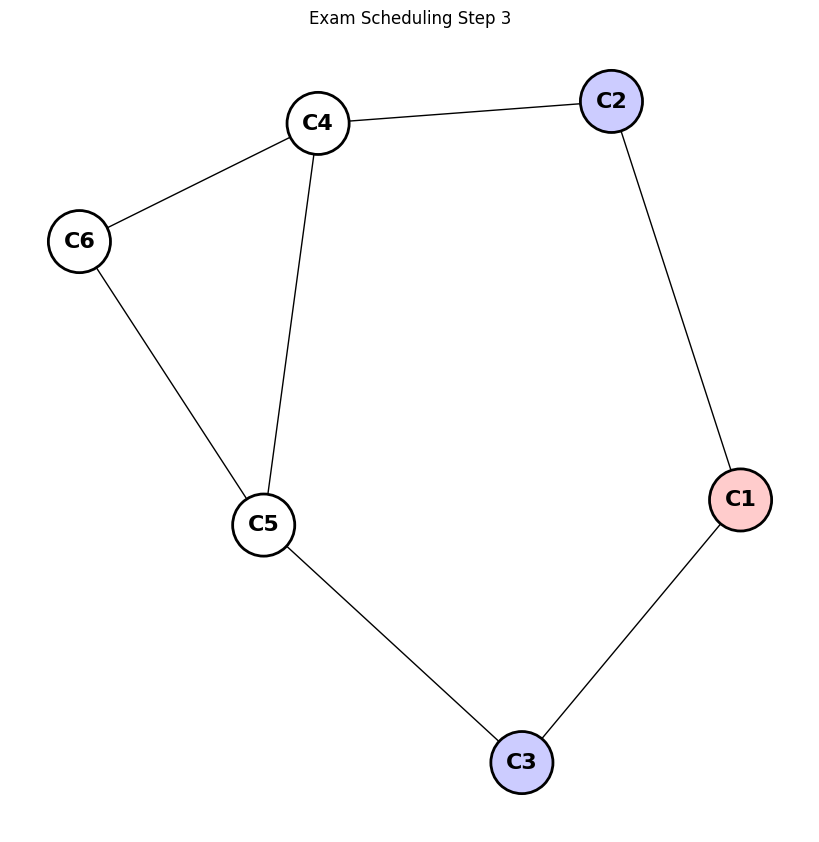

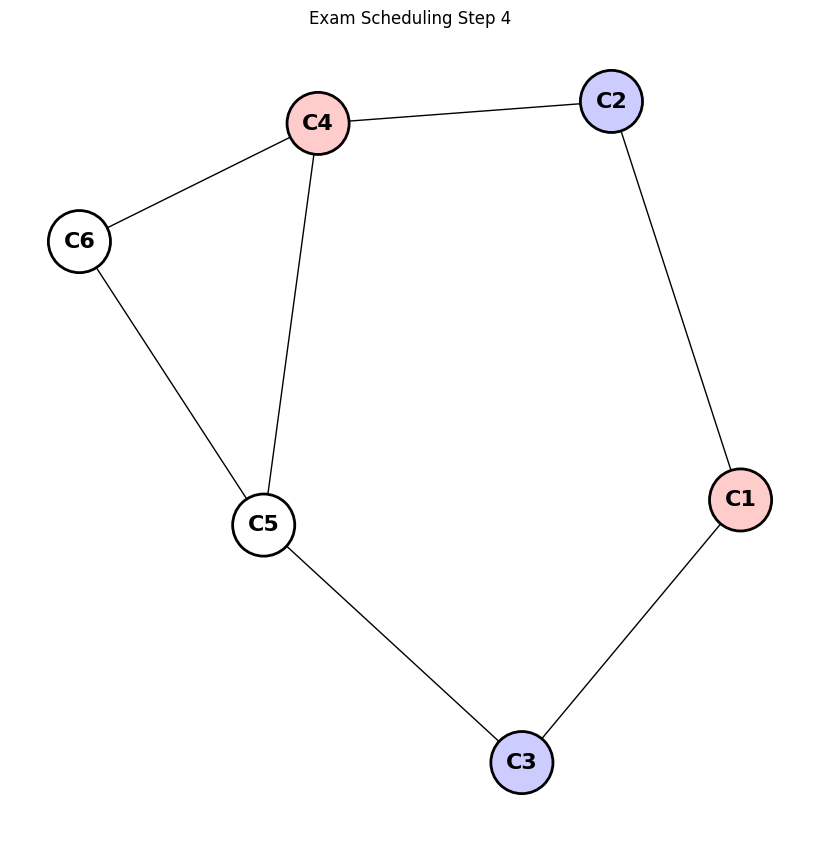

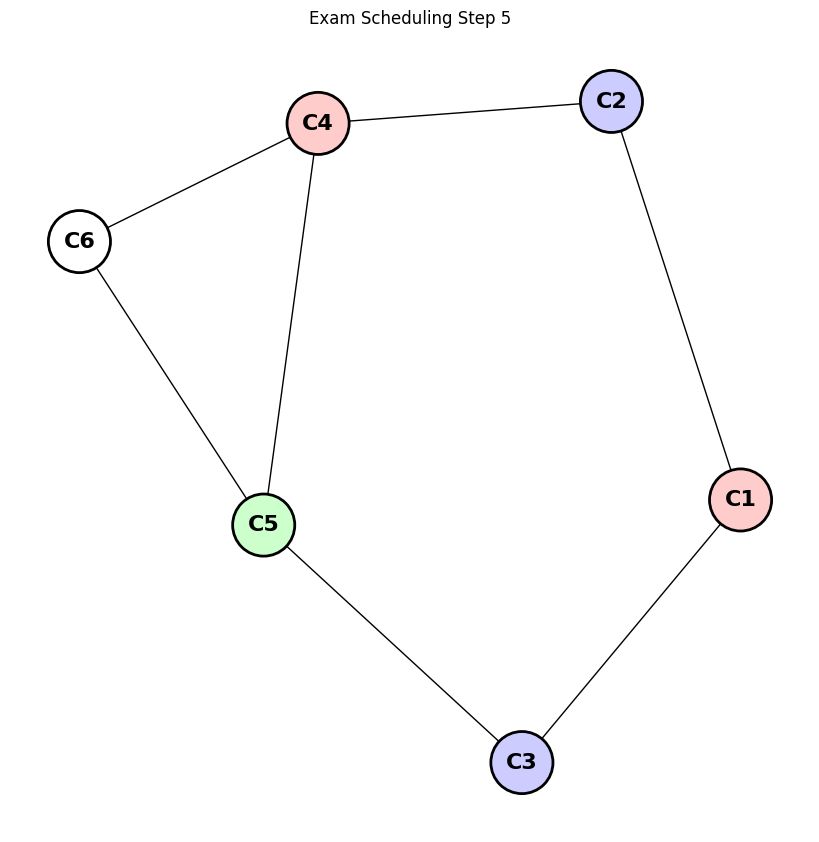

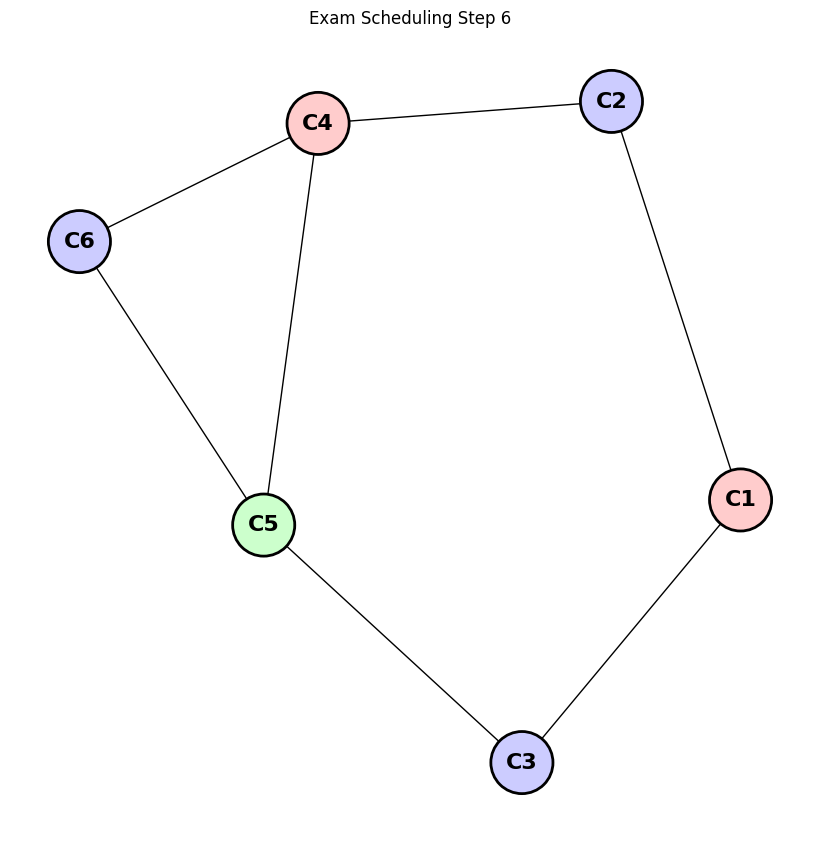

Final Exam Schedule: {'C1': 'Morning', 'C2': 'Afternoon', 'C3': 'Afternoon', 'C4': 'Morning', 'C5': 'Evening', 'C6': 'Afternoon'}


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph where nodes are courses and edges represent students enrolled in both courses
G = nx.Graph()
# Courses: C1, C2, C3, C4, C5, C6
# Edges between courses represent students taking both
edges = [('C1', 'C2'), ('C1', 'C3'), ('C2', 'C4'), ('C3', 'C5'), ('C4', 'C5'), ('C4', 'C6'), ('C5', 'C6')]
G.add_edges_from(edges)

# Step 2: Define the available time slots (colors)
time_slots = ['Morning', 'Afternoon', 'Evening']

# Step 3: Visualize the exam schedule step by step
def visualize_exam_schedule(assignment, step):
    plt.figure(figsize=(8, 8))  # Larger figure for clarity
    pos = nx.spring_layout(G, seed=42)  # Layout for better node positioning

    # Default color for unassigned courses is white
    node_colors = ['#ffffff'] * len(G.nodes)

    # Assign colors (time slots) to the courses based on the current assignment
    for node, slot in assignment.items():
        if slot == 'Morning':
            node_colors[list(G.nodes).index(node)] = '#FFCCCC'
        elif slot == 'Afternoon':
            node_colors[list(G.nodes).index(node)] = '#CCCCFF'
        elif slot == 'Evening':
            node_colors[list(G.nodes).index(node)] = '#CCFFCC'

    # Draw the graph with the current time slot assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Exam Scheduling Step {step}")
    plt.show()

# Step 4: Check if the time slot assignment is valid
def is_valid_time_slot(course, slot, assignment):
    # Ensure no neighboring course has the same time slot
    for neighbor in G.neighbors(course):
        if neighbor in assignment and assignment[neighbor] == slot:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic for selecting courses
def select_course_MRV(assignment):
    unassigned_courses = [course for course in G.nodes if course not in assignment]
    mrv_course = None
    min_remaining_slots = float('inf')

    for course in unassigned_courses:
        remaining_slots = sum(is_valid_time_slot(course, slot, assignment) for slot in time_slots)
        if remaining_slots < min_remaining_slots:
            min_remaining_slots = remaining_slots
            mrv_course = course

    return mrv_course

# Step 6: Degree Heuristic for selecting courses
def select_course_Degree(assignment):
    unassigned_courses = [course for course in G.nodes if course not in assignment]
    degree_course = max(unassigned_courses, key=lambda course: len([n for n in G.neighbors(course) if n not in assignment]))
    return degree_course

# Step 7: Backtracking with heuristics
def backtracking_exam_schedule(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All courses are scheduled

    # Choose the next course based on the chosen heuristic
    if heuristic == 'MRV':
        course = select_course_MRV(assignment)
    elif heuristic == 'Degree':
        course = select_course_Degree(assignment)
    else:
        course = list(G.nodes)[len(assignment)]  # Default to sequential assignment

    for slot in time_slots:
        if is_valid_time_slot(course, slot, assignment):
            assignment[course] = slot  # Assign the time slot
            visualize_exam_schedule(assignment, step)  # Visualize the current step
            result = backtracking_exam_schedule(assignment, heuristic, step + 1)
            if result:
                return result  # Return if a valid schedule is found
            del assignment[course]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Choose between MRV and Degree Heuristic
def schedule_exams_with_backtracking():
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    final_schedule = backtracking_exam_schedule({}, heuristic, 1)
    print("Final Exam Schedule:", final_schedule)

# Step 9: Run the exam scheduling with backtracking and chosen heuristic
schedule_exams_with_backtracking()


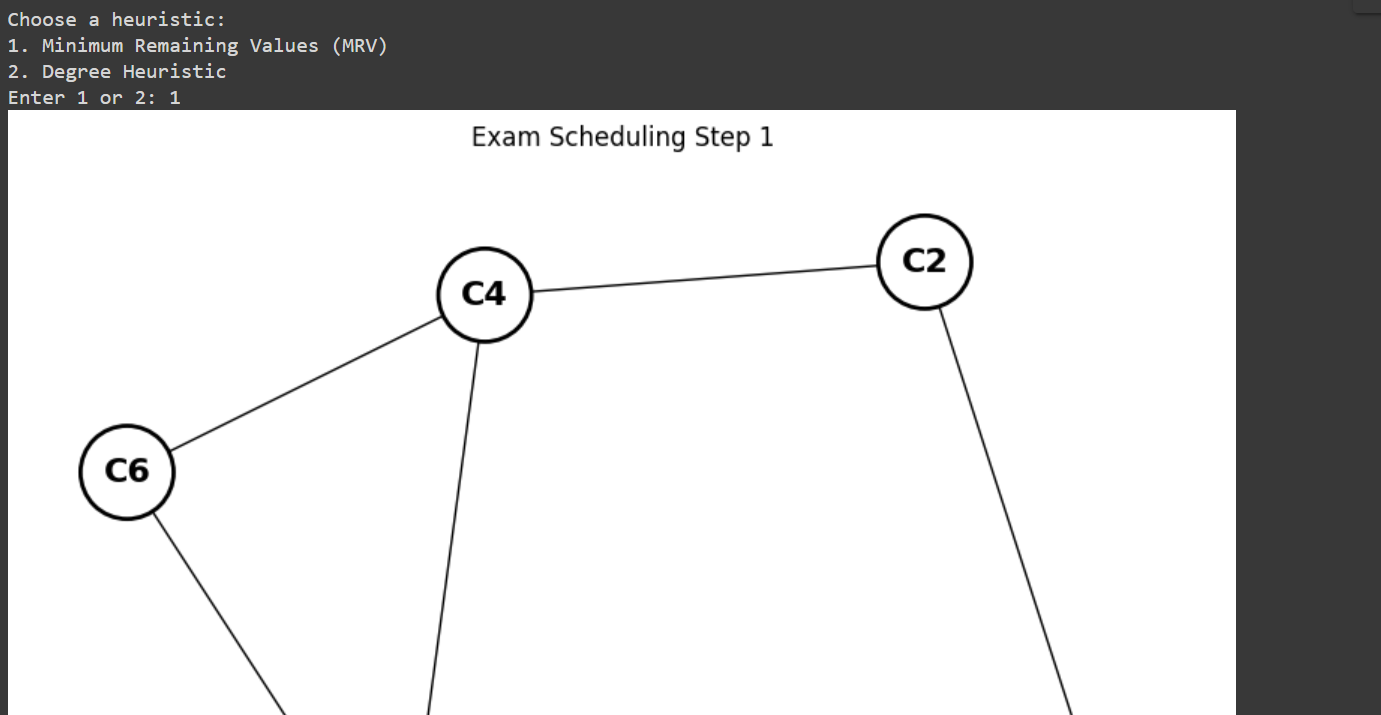